In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-segmentation/credit_card_customer_data.csv


In [63]:
data = pd.read_csv('/kaggle/input/credit-card-customer-segmentation/credit_card_customer_data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [64]:
data.drop(['Sl_No','Customer Key'],axis=1,inplace=True)

In [65]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(data)

data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


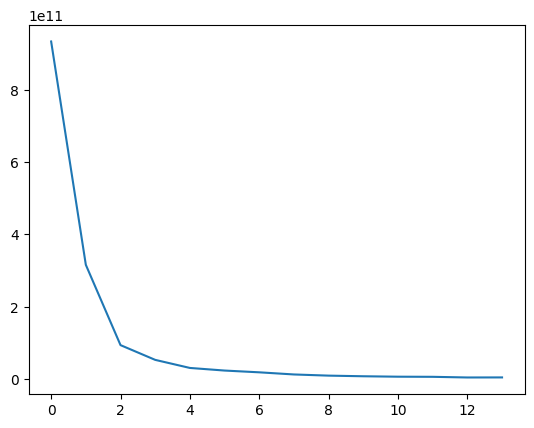

In [68]:
#Elbow Method 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = [] #Within Cluster Sum of Squared Distances

for i in range(1,15):
    est = KMeans(n_clusters=i,n_init='auto')
    est.fit_predict(data)
    wcss.append(est.inertia_)
plt.plot(wcss)


In [74]:
#Rapid drop observed at 4, hence 4 clusters

est = KMeans(n_clusters=6,n_init='auto')
clusters = est.fit_predict(data)
data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [75]:
data[clusters==0]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
2,50000,7,1,3,4
397,49000,5,3,2,0
401,48000,4,4,0,3
402,56000,4,2,0,2
...,...,...,...,...,...
594,60000,4,2,1,4
599,57000,6,2,2,0
603,60000,6,3,2,3
608,47000,4,4,1,0


In [76]:
data[clusters==1]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
619,158000,7,0,13,0
621,166000,9,1,12,2
622,176000,10,1,15,2
623,166000,10,0,7,0
624,178000,7,0,11,0
626,156000,9,1,10,2
627,146000,10,0,12,1
629,155000,8,0,7,2


In [77]:
data[clusters==2]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
5,20000,3,0,1,8
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7
10,10000,4,0,5,5
...,...,...,...,...,...
391,13000,4,5,0,0
392,6000,4,4,0,0
393,20000,4,2,0,1
394,13000,7,4,0,1


In [78]:
data[clusters==3]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
4,100000,6,0,12,3
6,100000,5,0,11,2
613,94000,9,1,11,0
615,131000,9,1,10,1
616,96000,10,1,11,2
617,136000,8,0,13,0
618,121000,7,0,13,2
620,108000,10,0,15,1
625,91000,8,1,6,1


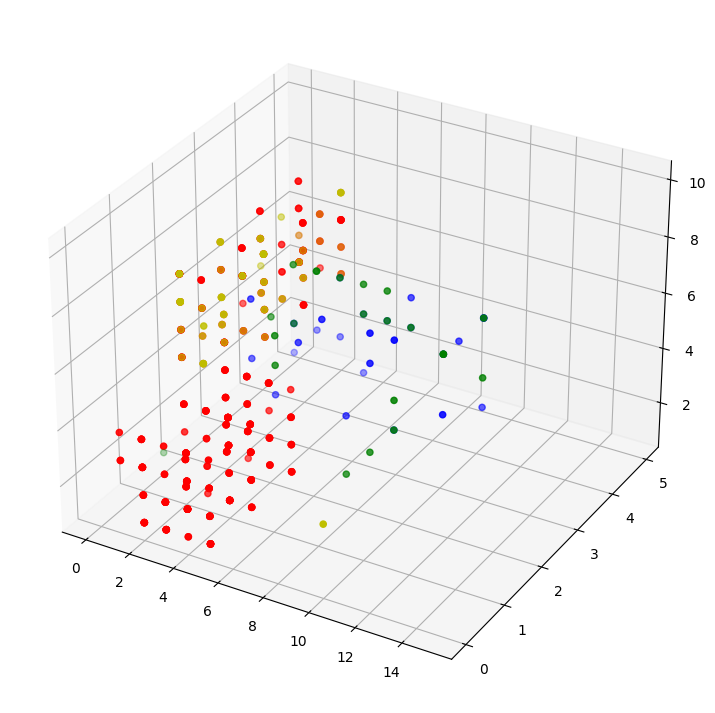

In [79]:

plt.figure(figsize=(14,9))
axs = plt.axes(projection='3d')
axs.scatter3D(data[clusters==0]['Total_visits_online'],data[clusters==0]['Total_visits_bank'],data[clusters==0]['Total_Credit_Cards'],c='y')
axs.scatter3D(data[clusters==1]['Total_visits_online'],data[clusters==1]['Total_visits_bank'],data[clusters==1]['Total_Credit_Cards'],c='b')
axs.scatter3D(data[clusters==2]['Total_visits_online'],data[clusters==2]['Total_visits_bank'],data[clusters==2]['Total_Credit_Cards'],c='r')
axs.scatter3D(data[clusters==3]['Total_visits_online'],data[clusters==3]['Total_visits_bank'],data[clusters==3]['Total_Credit_Cards'],c='g')